In [88]:
import pandas as pd
import glob

In [89]:
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'notebook_connected'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [90]:
pio.renderers.default = "notebook_connected"

In [91]:


# Verzeichnis der CSV-Dateien (z. B. falls sie alle in einem Ordner gespeichert sind)
csv_files = glob.glob('data/*.csv')

# Liste, um alle DataFrames zu speichern
dataframes = []

rename_columns = {
    'STRZUSTAND': 'USTRZUSTAND',
    # weitere Spalten
}

# Lade jede CSV-Datei, konvertiere die Spalten und füge den DataFrame der Liste hinzu
for file in csv_files:
    df = pd.read_csv(file, delimiter=';')
    # Konvertiere die Koordinaten in float
    df['XGCSWGS84'] = df['XGCSWGS84'].str.replace(',', '.').astype(float)
    df['YGCSWGS84'] = df['YGCSWGS84'].str.replace(',', '.').astype(float)
    df = df.rename(columns={col: new_col for col, new_col in rename_columns.items() if col in df.columns})
    dataframes.append(df)

# Verbinde alle DataFrames in einen großen DataFrame
unfaelle = pd.concat(dataframes, ignore_index=True)

# Überprüfe die ersten Zeilen des kombinierten DataFrames
unfaelle.head()


,OBJECTID,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,...,IstFuss,IstKrad,IstGkfz,IstSonstige,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84,USTRZUSTAND,UIDENTSTLAE
0,95521,5,3,15,0,2019,1,5,3,3,...,0,0,0,0,"355698,9316","5645896,103",6.945805,50.946603,1,NaN
1,95703,5,3,15,0,2019,1,4,3,2,...,0,0,0,0,"364105,2885","5643403,273",7.066328,50.926241,1,NaN
2,95717,5,3,15,0,2019,1,19,3,3,...,0,0,0,0,"356960,2754","5634849,847",6.968075,50.847644,1,NaN
3,96051,5,3,15,0,2019,1,14,1,2,...,0,0,0,0,"358260,0353","5644558,441",6.982760,50.935217,1,NaN
4,96074,5,3,15,0,2019,1,19,7,3,...,0,0,0,0,"364366,245","5641545,028",7.070730,50.909602,1,NaN


In [92]:
#save the data
unfaelle.to_csv('unfaelle.csv', index=False)


In [93]:
# Store accident types in a dictionary
accident_types = {
    1: "Zusammenstoß mit anfahrendem/ anhaltendem/ruhendem Fahrzeug",
    2: "Zusammenstoß mit vorausfahrendem / wartendem Fahrzeug",
    3: "Zusammenstoß mit seitlich in gleicher Richtung fahrendem Fahrzeug",
    4: "Zusammenstoß mit entgegenkommendem Fahrzeug",
    5: "Zusammenstoß mit einbiegendem / kreuzendem Fahrzeug",
    6: "Zusammenstoß zwischen Fahrzeug und Fußgänger",
    7: "Aufprall auf Fahrbahnhindernis",
    8: "Abkommen von Fahrbahn nach rechts",
    9: "Abkommen von Fahrbahn nach links",
    0: "Unfall anderer Art"
}

# Retrieve accident type by index
def get_accident_type(index):
    return accident_types.get(index, "Unknown accident type")

# copy the data
unfaelle_edit = unfaelle.copy()
unfaelle_edit['UART'] = unfaelle_edit['UART'].map(accident_types)

In [94]:
months = {
    1: "Januar",
    2: "Februar",
    3: "März",
    4: "April",
    5: "Mai",
    6: "Juni",
    7: "Juli",
    8: "August",
    9: "September",
    10: "Oktober",
    11: "November",
    12: "Dezember"
}
unfaelle_edit['UMONAT'] = unfaelle_edit['UMONAT'].map(months)

In [95]:
weekday = {
    1: "Montag",
    2: "Dienstag",
    3: "Mittwoch",
    4: "Donnerstag",
    5: "Freitag",
    6: "Samstag",
    7: "Sonntag"
}
unfaelle_edit['UWOCHENTAG'] = unfaelle_edit['UWOCHENTAG'].map(weekday)

In [96]:
category = {
    1: "Unfall mit Getöteten",
    2: "Unfall mit Schwerverletzten",
    3: "Unfall mit Leichtverletzten",
}
unfaelle_edit['UKATEGORIE'] = unfaelle_edit['UKATEGORIE'].map(category)

In [97]:
light = {
    0: "Tageslicht",
    1: "Dämmerung",
    2: "Dunkelheit"
}
unfaelle_edit['ULICHTVERH'] = unfaelle_edit['ULICHTVERH'].map(light)

In [98]:
condition = {
    0: "trocken",
    1: "nass/feucht",
    2: "winterglatt",
}
unfaelle_edit['USTRZUSTAND'] = unfaelle_edit['USTRZUSTAND'].map(condition)


In [99]:
# make new column with a string comma seperated of the participants in the accident if IstRad is Rad is 1 add Rad to the string in this column for the row
unfaelle_edit['Participants'] = unfaelle_edit['IstRad'].apply(lambda x: 'Rad, ' if x == 1 else "")
unfaelle_edit['Participants'] = unfaelle_edit['Participants'] + unfaelle_edit['IstFuss'].apply(lambda x: 'Fuss, ' if x == 1 else "")
unfaelle_edit['Participants'] = unfaelle_edit['Participants'] + unfaelle_edit['IstKrad'].apply(lambda x: 'Krad, ' if x == 1 else "")
unfaelle_edit['Participants'] = unfaelle_edit['Participants'] + unfaelle_edit['IstPKW'].apply(lambda x: 'PKW, ' if x == 1 else "")
unfaelle_edit['Participants'] = unfaelle_edit['Participants'] + unfaelle_edit['IstGkfz'].apply(lambda x: 'Gkfz, ' if x == 1 else "")
unfaelle_edit['Participants'] = unfaelle_edit['Participants'] + unfaelle_edit['IstSonstige'].apply(lambda x: 'Sonstige' if x == 1 else "")

#remove the last comma
unfaelle_edit['Participants'] = unfaelle_edit['Participants'].str.rstrip(', ')

unfaelle_edit['Participants']

0                  PKW
1                  PKW
2                  PKW
3                  PKW
4                  PKW
             ...      
12492    PKW, Sonstige
12493              PKW
12494              PKW
12495    PKW, Sonstige
12496    PKW, Sonstige
Name: Participants, Length: 12497, dtype: object

In [100]:
type = {
    1: "Fahrunfall",
    2: "Abbiegeunfall",
    3: "Einbiegen / Kreuzen-Unfall",
    4: "Überschreiten-Unfall",
    5: "Unfall durch ruhenden Verkehr",
    6: "Unfall im Längsverkehr",
    7: "Sonstiger Unfall"
}
unfaelle_edit['UTYP1'] = unfaelle_edit['UTYP1'].map(type)

In [101]:
unfaelle_edit.head()

,OBJECTID,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,...,IstKrad,IstGkfz,IstSonstige,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84,USTRZUSTAND,UIDENTSTLAE,Participants
0,95521,5,3,15,0,2019,Januar,5,Mittwoch,Unfall mit Leichtverletzten,...,0,0,0,"355698,9316","5645896,103",6.945805,50.946603,nass/feucht,NaN,PKW
1,95703,5,3,15,0,2019,Januar,4,Mittwoch,Unfall mit Schwerverletzten,...,0,0,0,"364105,2885","5643403,273",7.066328,50.926241,nass/feucht,NaN,PKW
2,95717,5,3,15,0,2019,Januar,19,Mittwoch,Unfall mit Leichtverletzten,...,0,0,0,"356960,2754","5634849,847",6.968075,50.847644,nass/feucht,NaN,PKW
3,96051,5,3,15,0,2019,Januar,14,Montag,Unfall mit Schwerverletzten,...,0,0,0,"358260,0353","5644558,441",6.982760,50.935217,nass/feucht,NaN,PKW
4,96074,5,3,15,0,2019,Januar,19,Sonntag,Unfall mit Leichtverletzten,...,0,0,0,"364366,245","5641545,028",7.070730,50.909602,nass/feucht,NaN,PKW


In [102]:
#get rid of outlier coordinates
unfaelle_edit = unfaelle_edit[(unfaelle_edit['XGCSWGS84'] < 7.16) & (unfaelle_edit['YGCSWGS84'] > 50.825)]

In [103]:
labels = {
    "OBJECTID": "Objekt ID",
    "UJAHR": "Unfall Jahr",
    "UMONAT": "Unfall Monat",
    "UWOCHENTAG": "Wochentag",
    "USTUNDE": "Stunde",
    "UKATEGORIE": "Unfallkategorie",
    "ULICHTVERH": "Lichtverhältnisse",
    "STRZUSTAND": "Straßenzustand",
    "Participants": "Teilnehmer"
}

import plotly.express as px
#plot only category 1 and 2
#unfaelle_edit = unfaelle_edit[unfaelle_edit['UKATEGORIE'].isin(['Unfall mit Getöteten'])]

fig = px.scatter_map(unfaelle_edit, lat="YGCSWGS84", lon="XGCSWGS84", hover_name="UART", hover_data=["OBJECTID","UJAHR","UMONAT",
                                                                                                     "UWOCHENTAG","USTUNDE", "UKATEGORIE", "UTYP1", "ULICHTVERH", "USTRZUSTAND", "Participants"],
                        color_discrete_sequence=["red"], zoom=9, height=300, labels=labels)
fig.update_layout(map_style="open-street-map")

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [104]:
unfaelle_months = unfaelle_edit['UMONAT'].value_counts().sort_index()
#sort after month
unfaelle_months['UMONAT'] = pd.Categorical(unfaelle_edit['UMONAT'], categories=months.values(), ordered=True)

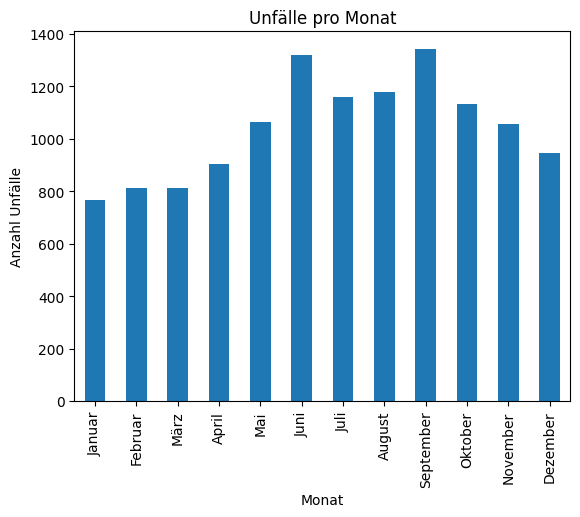

In [105]:
#plot the number of accidents per month with a bar chart in matplotlib sortiert nach monaten
import matplotlib.pyplot as plt
unfaelle_months['UMONAT'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Monat')
plt.ylabel('Anzahl Unfälle')
plt.title('Unfälle pro Monat')
plt.show()


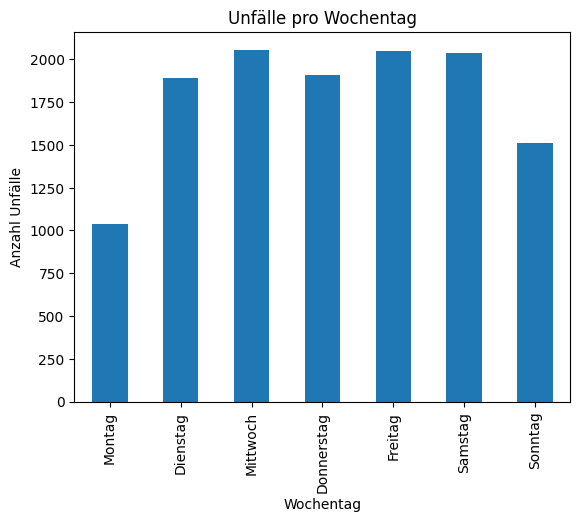

In [106]:
#plot the number of accidents by the day of the week sorted by the day of the week
unfaelle_weekday = unfaelle_edit['UWOCHENTAG'].value_counts().sort_index()
unfaelle_weekday['UWOCHENTAG'] = pd.Categorical(unfaelle_edit['UWOCHENTAG'], categories=weekday.values(), ordered=True)

unfaelle_weekday['UWOCHENTAG'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Wochentag')
plt.ylabel('Anzahl Unfälle')
plt.title('Unfälle pro Wochentag')
plt.show()

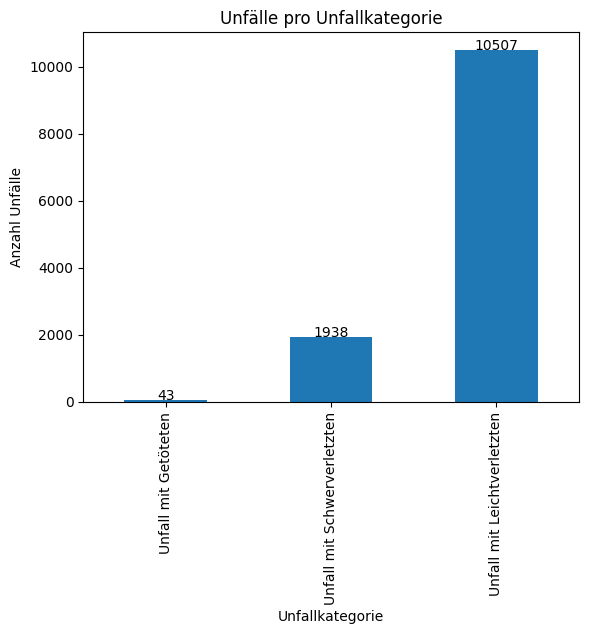

In [107]:
#plot the number of accidents by the category of the accident
unfaelle_category = unfaelle_edit['UKATEGORIE'].value_counts().sort_index()
unfaelle_category['UKATEGORIE'] = pd.Categorical(unfaelle_edit['UKATEGORIE'], categories=category.values(), ordered=True)

unfaelle_category['UKATEGORIE'].value_counts().sort_index().plot(kind='bar')
#plot exact values onto the bar chart
for i, v in enumerate(unfaelle_category['UKATEGORIE'].value_counts().sort_index()):
    plt.text(i, v, str(v), ha='center')
plt.xlabel('Unfallkategorie')
plt.ylabel('Anzahl Unfälle')
plt.title('Unfälle pro Unfallkategorie')
plt.show()

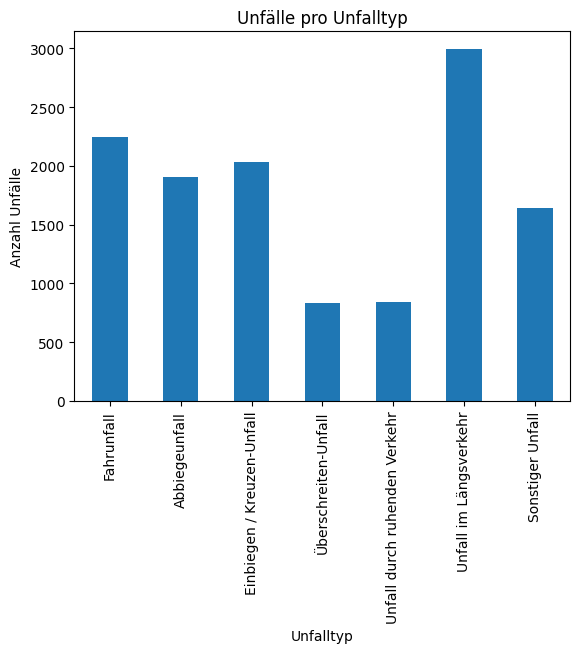

In [108]:
#plot the number of accidents by the type of the accident
unfaelle_type = unfaelle_edit['UTYP1'].value_counts().sort_index()
unfaelle_type['UTYP1'] = pd.Categorical(unfaelle_edit['UTYP1'], categories=type.values(), ordered=True)

unfaelle_type['UTYP1'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Unfalltyp')
plt.ylabel('Anzahl Unfälle')
plt.title('Unfälle pro Unfalltyp')
plt.show()


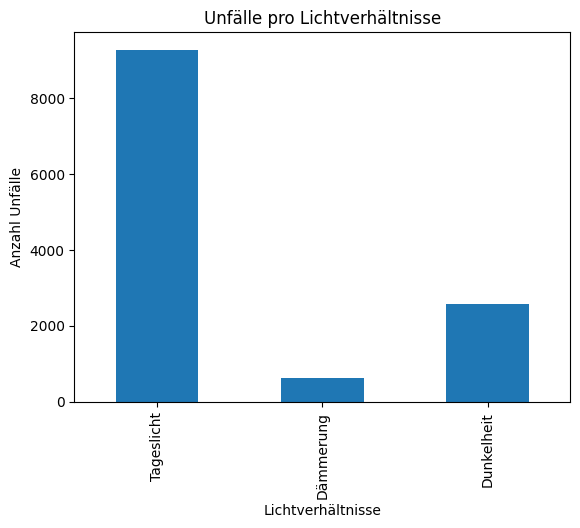

In [109]:
#plot the number of accidents by the light conditions
unfaelle_light = unfaelle_edit['ULICHTVERH'].value_counts().sort_index()
unfaelle_light['ULICHTVERH'] = pd.Categorical(unfaelle_edit['ULICHTVERH'], categories=light.values(), ordered=True)

unfaelle_light['ULICHTVERH'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Lichtverhältnisse')
plt.ylabel('Anzahl Unfälle')
plt.title('Unfälle pro Lichtverhältnisse')
plt.show()


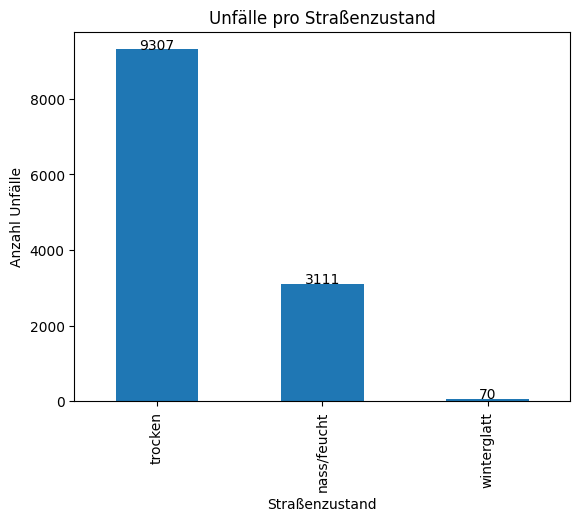

In [110]:
#plot the number of accidents by the road conditions
unfaelle_condition = unfaelle_edit['USTRZUSTAND'].value_counts().sort_index()
unfaelle_condition['USTRZUSTAND'] = pd.Categorical(unfaelle_edit['USTRZUSTAND'], categories=condition.values(), ordered=True)

unfaelle_condition['USTRZUSTAND'].value_counts().sort_index().plot(kind='bar')
#plot the exact values onto the bar chart
for i, v in enumerate(unfaelle_condition['USTRZUSTAND'].value_counts().sort_index()):
    plt.text(i, v, str(v), ha='center')
plt.xlabel('Straßenzustand')
plt.ylabel('Anzahl Unfälle')
plt.title('Unfälle pro Straßenzustand')
plt.show()

126 Tage Regen im Jahr im Schnitt
Heißt 34% der Tage im Jahr regnet es ca.
Aber hier nur 25% Unfälle bei Regen
Also Regen keinen starken Einfluss auf Unfälle

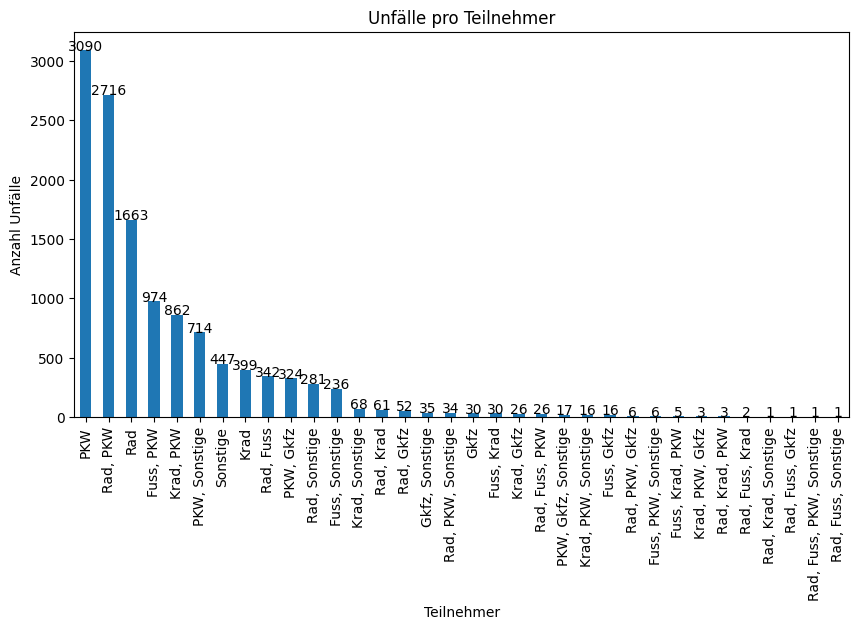

In [111]:
#plot the number of accidents by the participants
unfaelle_participants = unfaelle_edit['Participants'].value_counts().sort_index()
unfaelle_participants['Participants'] = pd.Categorical(unfaelle_edit['Participants'], categories=unfaelle_edit['Participants'].unique())

#sort the values by the amount of accidents


plt.figure(figsize=(10,5))
unfaelle_participants['Participants'].value_counts().sort_values(ascending=False).plot(kind='bar')
#plot the exact values onto the bar chart
for i, v in enumerate(unfaelle_participants['Participants'].value_counts().sort_values(ascending=False)):
    plt.text(i, v, str(v), ha='center')
plt.xlabel('Teilnehmer')
plt.ylabel('Anzahl Unfälle')
plt.title('Unfälle pro Teilnehmer')
plt.show()


In [112]:
#print the coordinates of the accidents with participants rad fuss sonstige
unfaelle_edit[(unfaelle_edit['IstRad'] == 1) & (unfaelle_edit['IstFuss'] == 1) & (unfaelle_edit['IstSonstige'] == 1)][['XGCSWGS84', 'YGCSWGS84', 'Participants']]

,XGCSWGS84,YGCSWGS84,Participants
8548,6.957106,50.952176,"Rad, Fuss, PKW, Sonstige"
9606,6.896975,50.937170,"Rad, Fuss, Sonstige"


In [113]:
unfaelle_cut = unfaelle.drop(columns=['XGCSWGS84', 'YGCSWGS84', 'OBJECTID', 'IstRad', 
                                                        'IstFuss', 'IstKrad', 'IstPKW', 'IstGkfz', 
                                                        'IstSonstige', 'LINREFX', 'LINREFY', 'UIDENTSTLAE', "UJAHR", "UMONAT", "ULAND", "UGEMEINDE", "UKREIS", "UREGBEZ"])

In [114]:
unfaelle_cut

,USTUNDE,UWOCHENTAG,UKATEGORIE,UART,UTYP1,ULICHTVERH,USTRZUSTAND
0,5,3,3,3,7,2,1
1,4,3,2,9,7,2,1
2,19,3,3,2,6,2,1
3,14,1,2,8,1,0,1
4,19,7,3,2,6,2,1
...,...,...,...,...,...,...,...
12492,3,2,3,1,5,2,0
12493,18,6,3,5,3,0,0
12494,10,4,3,4,7,0,0
12495,7,2,2,5,3,0,0


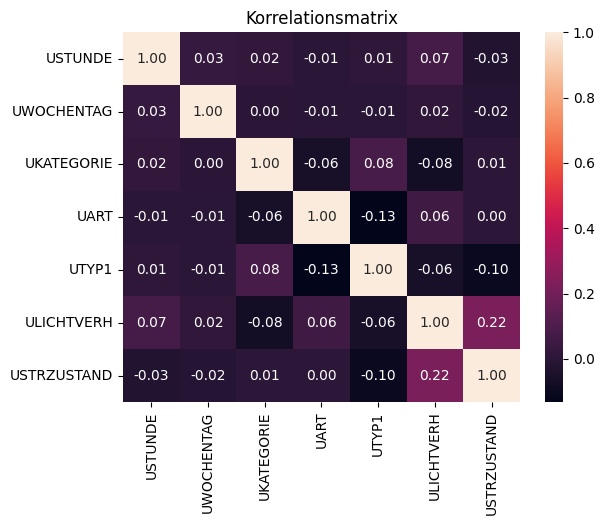

In [115]:
#plot the correlation matrix
import seaborn as sns

sns.heatmap(unfaelle_cut.corr(), annot=True, fmt=".2f")
#fit the matrix to the plot
plt.title('Korrelationsmatrix')

plt.show()

In [116]:
#pca on unfaelle_cut
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#scale the data
scaler = StandardScaler()
unfaelle_scaled = scaler.fit_transform(unfaelle_cut)

#apply pca
pca = PCA()
unfaelle_pca = pca.fit_transform(unfaelle_scaled)

#plot the explained variance ratio
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Anzahl der Komponenten')
plt.ylabel('Erklärte Varianz')
plt.title('Erklärte Varianz durch die Anzahl der Komponenten')
plt.show()

#choose components that explain 95% of the variance
pca = PCA(n_components=0.95)
unfaelle_pca = pca.fit_transform(unfaelle_scaled)

pca.


SyntaxError: invalid syntax (3818422920.py, line 24)